In [1]:
# COLAB LINK: https://colab.research.google.com/drive/1_icB9nJZqCFFxZbvKdpaKBUWqiNtw3GJ

!rm -rf bdw
!git clone https://github.com/rmarcacini/bdw
!cd bdw; mv bdw/* .
!pip install node2vec

Cloning into 'bdw'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 52 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [0]:
import bdw.models as nrl
import bdw.load_networks as nets
import bdw.evaluation as evaluation
import time
import networkx as nx
import random
import matplotlib as mpl
import matplotlib.colors as mcolors

In [3]:
G,num_classes = nets.get_dataset_footbal()
labeled_nodes = evaluation.sample_labeled_nodes(G,train_size=0.1)

Loading footbal network...
Loading footbal network... OK!


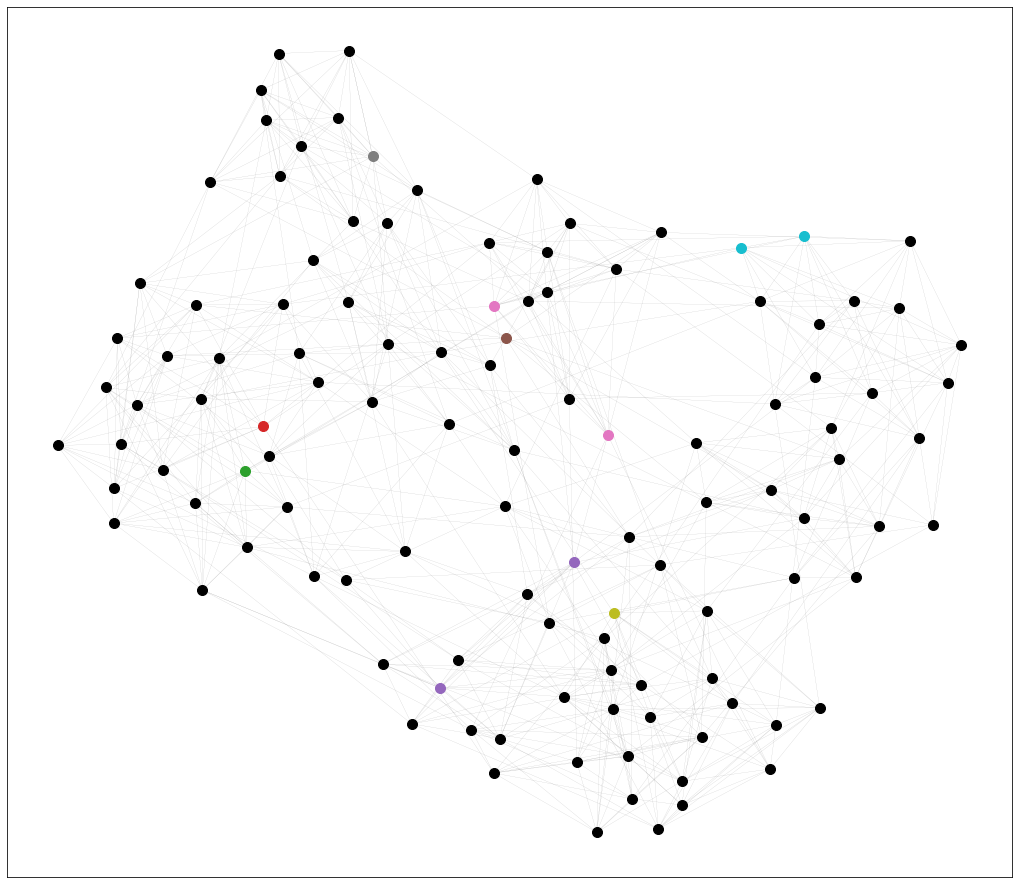

In [4]:

colors = list(mcolors._colors_full_map.values())
random.shuffle(colors)
for s in mcolors.TABLEAU_COLORS: colors.insert(0,s)
colors.remove('#000000')
colors.remove('#ffffff')

mpl.rcParams['figure.figsize'] = [18.0, 16.0]

pos=nx.spring_layout(G)

label_color = {}
node_color = {}
counter=0

for node in G.nodes():
  
  if node in labeled_nodes:
    if G.nodes[node]['label'] not in label_color:
      label_color[G.nodes[node]['label']] = counter
      counter+=1
    node_color[node] = colors[label_color[G.nodes[node]['label']]]
  else:
    node_color[node] = 'black'

  nx.draw_networkx_nodes(G,pos,
                        nodelist=[node],
                        node_color=node_color[node],
                        node_size=100)

nx.draw_networkx_edges(G,pos,width=0.1, edge_color='grey')

In [5]:
print('\nDeep Walk')
time.sleep(1)
dw = nrl.deepwalk(G)

print('\nNode2Vec q=0.5 p=1')
time.sleep(1)
node2vec_v1 = nrl.node2vec(G,q=0.5,p=1)

print('\nNode2Vec q=1 p=0.5')
time.sleep(1)
node2vec_v2 = nrl.node2vec(G,q=1,p=0.5)

print('\nBiased Deep Walk')
time.sleep(1)
bdw = nrl.bdw(G, labeled_nodes, num_classes)


models = {'bdw': bdw, 'dw': dw, 'node2vec q=0.5 p=1': node2vec_v1, 'node2vec q=1 p=0.5': node2vec_v2}



Deep Walk


Generating walks (CPU: 1): 100%|██████████| 30/30 [00:01<00:00, 21.22it/s]



Node2Vec q=0.5 p=1


Generating walks (CPU: 1): 100%|██████████| 30/30 [00:01<00:00, 20.96it/s]



Node2Vec q=1 p=0.5


Generating walks (CPU: 1): 100%|██████████| 30/30 [00:01<00:00, 20.42it/s]



Biased Deep Walk


Iteration 15 | Energy = 8.401047325834575: 100%|██████████| 15/15 [00:00<00:00, 60.61it/s]
Generating walks (CPU: 1): 100%|██████████| 30/30 [00:01<00:00, 21.08it/s]


In [6]:
for model in models:
  print('\nModel',model)
  X_train,y_train,X_test,y_test = evaluation.get_train_test(G,labeled_nodes,models[model])
  preds = evaluation.linear_svc(X_train,y_train,X_test,y_test)
  metrics = evaluation.metrics(y_test,preds)
  print('\tAccuracy=',metrics['accuracy'])
  print('\tMacro-avg',metrics['macro avg']['f1-score'])
  print('\tWeighted-avg',metrics['weighted avg']['f1-score'])


Model bdw
	Accuracy= 0.6442307692307693
	Macro-avg 0.5032834757834758
	Weighted-avg 0.5536415187376726

Model dw
	Accuracy= 0.6153846153846154
	Macro-avg 0.4607237001531031
	Weighted-avg 0.5268457226076946

Model node2vec q=0.5 p=1
	Accuracy= 0.4423076923076923
	Macro-avg 0.3167538159694722
	Weighted-avg 0.35513298778225166

Model node2vec q=1 p=0.5
	Accuracy= 0.625
	Macro-avg 0.4621336175506315
	Weighted-avg 0.5245927291082073
